# Trabalho Inferencia Estatistica!!

* Ian de Holanda Cavalcanti Bezerra - 13835412
* Hiago Vinicius Américo - 11218469
* Nina Cunha Pinheiro - 13686500
* Bruna Romero Arraes 11913896

Escolhemos como DataSet o "Students' Social Media Addiction", pois ele apresenta um tema presente para o cotidiano de todo jovem. Vício em redes sociais é uma das maiores realidades presentes no cotidiano do jovem moderno, muitos, não têm muitas memórias de um tempo onde celulares e redes sociais não existiam.
 
Usamos este DataSet que apresenta dados qualitativos e quantitativos para realizar um estudo e entender melhor quais são os efeitos do uso dessas redes sociais em situações de vício e não-vício para diversos fatores que vão desde vida social até performance acadêmica.

Buscamos fazer análises de inferência estatística para demonstrar os conhecimentos adquiridos durante o semestre de forma prática. Visamos também, pelo decorrer desta prática, criar uma atividade didática com que o leitor do código não veja apenas resultados, mas sim possa acompanhar e aprender mais sobre estas ferramentas estatísticas.

# ________________________________________________

### Carregando o DataSet Usando Pandas

Pandas é uma ferramenta revolucionária para áreas como ciência de dados e estatística, ele permite a manipulação de dados de forma fácil e eficiente. Seu sucesso e popularidade criou uma plataforma unificada para a integração de dataframes (estrutura de dado fundamental do Pandas) com outras bibliotecas de Python como NumPy e SciPy (matemática), Matplotlib e Seaborn (visualização). As implementações de kernels em linguagens eficientes como C presentes nestas bibliotecas permitem que a simplicidade de sintaxe e abstração fornecida por uma linguagem de alto nível como Python seja usada juntamente com a velocidade de uma linguagem de baixo nível.
 
Com isso vamos carregar o Dataset baixado no Kaggle (plataforma de compartilhamento de datasets).
 
https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?resource=download
 
Carregamos a tabela CSV em um DataFrame de Pandas e usamos pandas.head() para visualizar algumas informações básicas. 
 
O DataFrame é uma estrutura de dados conceitualmente muito parecida a uma tabela de Excel, ela utiliza tabelas para a organização e armazenamento desses dados, dentro dos slots podemos armazenar qualquer forma de objeto que achamos no cotidiano do Python: Listas, Int, Float, String. 
 
Chamamos uma certa linha e coluna de uma tabela de um DataPoint. Podemos estudar e visualizar estes datapoints em busca de diversas informações escondidas neles, buscamos entender fatores presentes nos valores e distribuição desses pontos como variância, média, desvio padrão, outliers e etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
plt.style.use('default')
sns.set_palette("husl")

# Load the correct CSV file
df = pd.read_csv('../Data/Students_Social.csv')

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Shape: (705, 13)

First 5 rows:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score

## Primeiras Visualizações e Análise Exploratória de Dados
 
Para a realização bem sucedida de análises estatísticas, sejam estes testes de média, testes de variância, ou até modelos de regressão linear, precisamos ter um bom entendimento do que nossos dados se tratam. Assim podemos criar hipóteses a serem testadas, ou buscar possíveis padrões a serem aprendidos. 
 
Usamos o poder das visualizações (Plots) para realizar esta tarefa, por meio dessas visualizações podemos criar noções básicas sobre o padrão de distribuição desses datapoints assim como a qualidade e extensão dos dados disponíveis. 

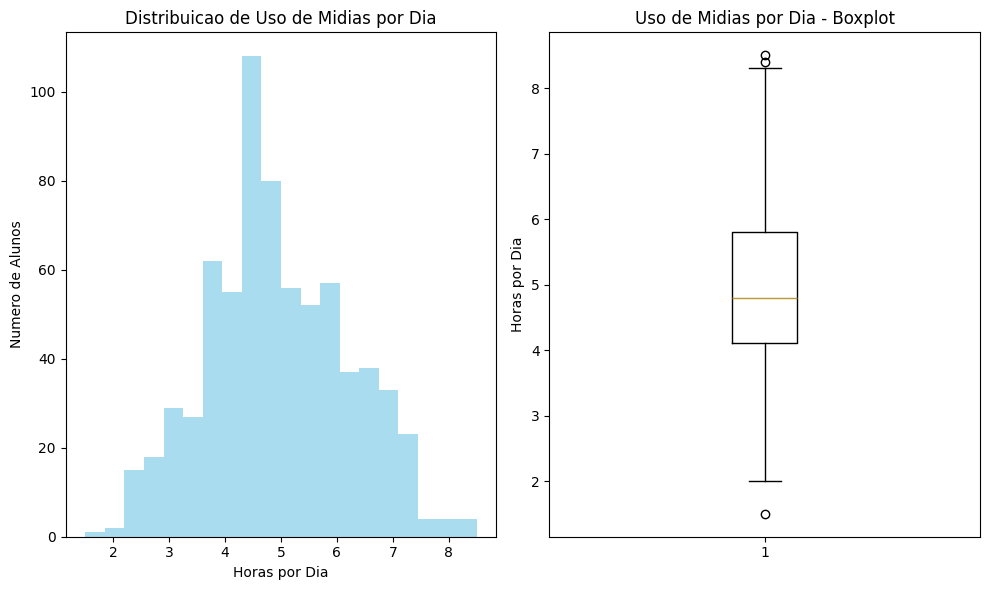

Media de Uso de Midias por Dia: 4.92 horas
Maximo de Uso de Midias por Dia: 8.50 horas


In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Avg_Daily_Usage_Hours'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribuicao de Uso de Midias por Dia')
plt.xlabel('Horas por Dia')
plt.ylabel('Numero de Alunos')

plt.subplot(1, 2, 2)
plt.boxplot(df['Avg_Daily_Usage_Hours'])
plt.title('Uso de Midias por Dia - Boxplot')
plt.ylabel('Horas por Dia')

plt.tight_layout()
plt.show()

print(f"Media de Uso de Midias por Dia: {df['Avg_Daily_Usage_Hours'].mean():.2f} horas")
print(f"Maximo de Uso de Midias por Dia: {df['Avg_Daily_Usage_Hours'].max():.2f} horas")


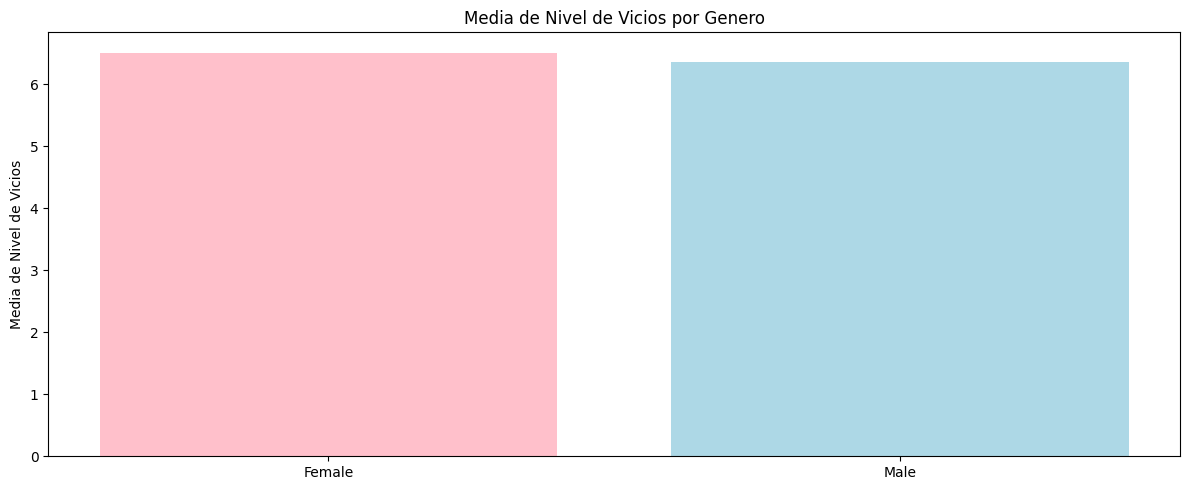

Nivel de Vicios por Genero:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  353.0  6.515581  1.709070  3.0  5.0  7.0  8.0  9.0
Male    352.0  6.357955  1.452866  2.0  5.0  7.0  7.0  9.0


In [20]:
plt.figure(figsize=(12, 5))

gender_addiction = df.groupby('Gender')['Addicted_Score'].mean()
plt.bar(gender_addiction.index, gender_addiction.values, color=['pink', 'lightblue'])
plt.title('Media de Nivel de Vicios por Genero')
plt.ylabel('Media de Nivel de Vicios')

plt.tight_layout()
plt.show()

print("Nivel de Vicios por Genero:")
print(df.groupby('Gender')['Addicted_Score'].describe())


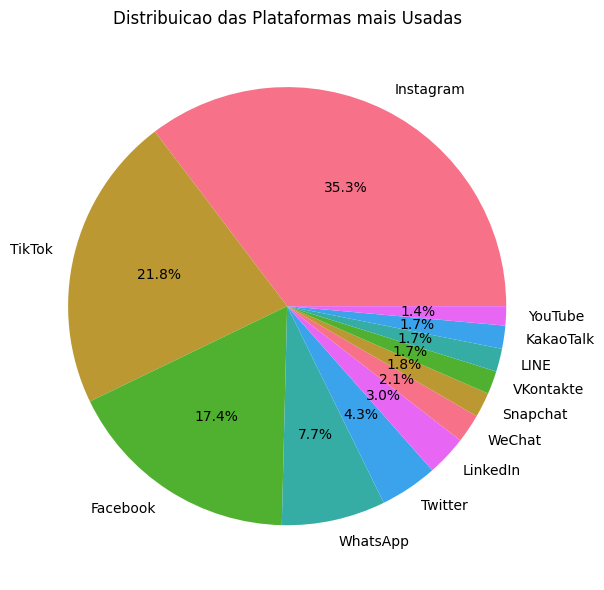

Estatisticas de uso das plataformas:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


In [18]:
plt.figure(figsize=(12, 6))

platform_counts = df['Most_Used_Platform'].value_counts()
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Distribuicao das Plataformas mais Usadas')

plt.tight_layout()
plt.show()

print("Estatisticas de uso das plataformas:")
print(platform_counts)


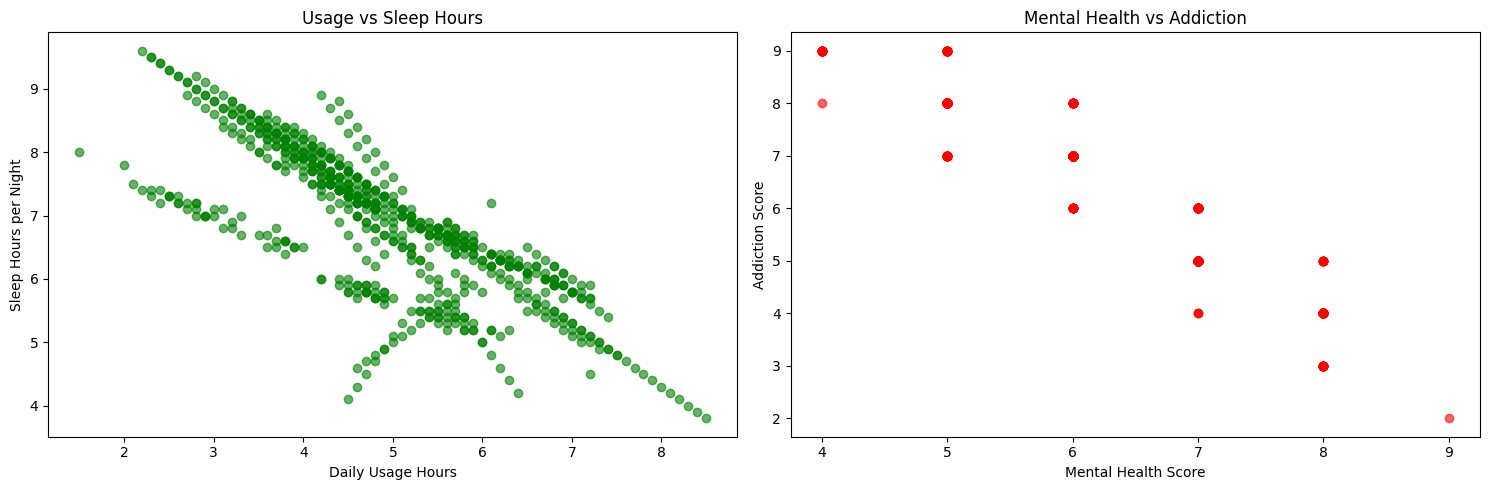

Correlacoes:
Uso de Midias vs Sono: -0.791
Saude Mental vs Nivel de Vicios: -0.945


In [ ]:
plt.figure(figsize=(15, 5))

# Uso de Midias vs Sono
plt.subplot(1, 2, 1)
plt.scatter(df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'], alpha=0.6, color='green')
plt.xlabel('Uso de Midias')
plt.ylabel('Sono')
plt.title('Uso de Midias vs Sono')

# Mental Health vs Nivel de Vicios
plt.subplot(1, 2, 2)
plt.scatter(df['Mental_Health_Score'], df['Addicted_Score'], alpha=0.6, color='red')
plt.xlabel('Saude Mental')
plt.ylabel('Nivel de Vicios')
plt.title('Saude Mental vs Nivel de Vicios')

plt.tight_layout()
plt.show()

# Correlacoes
print("Correlacoes:")
print(f"Uso de Midias vs Sono: {df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']):.3f}")
print(f"Saude Mental vs Nivel de Vicios: {df['Mental_Health_Score'].corr(df['Addicted_Score']):.3f}")


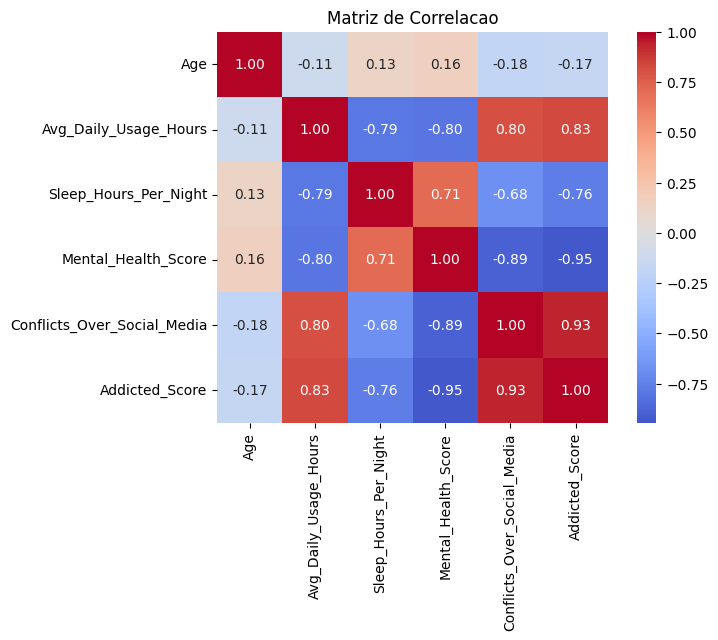


🎯 Key Insights:
• 64.3% of students report academic performance impact
• Average addiction score: 6.4/10
• Students sleep an average of 6.9 hours per night


In [13]:
plt.figure(figsize=(14, 6))

# Correlacao entre as variaveis numericas
plt.subplot(1, 2, 2)
numerical_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Matriz de Correlacao')

plt.tight_layout()
plt.show()


print("\n🎯 Insights:")
print(f"• {academic_impact['Yes']/(academic_impact['Yes']+academic_impact['No'])*100:.1f}% de alunos reportam impacto na performance academica")
print(f"• Media de nivel de vicios: {df['Addicted_Score'].mean():.1f}/10")
print(f"• Alunos dormem em media de {df['Sleep_Hours_Per_Night'].mean():.1f} horas por noite")


## O que podemos tirar dessa análise inicial?

Observamos de forma visual que há sim influência (Correlação) entre os fatores. Em algumas visualizações estas características ficam bem claras, quando observamos o plot de horas de sono vs horas de uso de mídias sociais vemos que claramente não há uma distribuição aleatória, e existe sim uma relação entre estes fatores. Análises prévias como estas nos possibilitam criar hipóteses com maior rigor do que apenas existe ou não existe correlação. 

Seguindo adiante vamos expandir estas hipóteses e por meio da inferência estatística analisar se estas estão certas ou não. Devemos sempre lembrar que estamos buscando, por meio de dados coletados de um grupo de pessoas, entender e generalizar o comportamento da sociedade como um todo. Buscamos identificar padrões dentro desta amostra e esperamos que eles possam ser refletidos para a população em geral.

# ____________________________________________________\

## Teste Qui-Quadrado

O teste qui-quadrado é uma ferramenta fundamental da inferência estatística que nos permite investigar se existe associação significativa entre duas variáveis categóricas. Esta técnica é especialmente valiosa quando trabalhamos com dados qualitativos, como gênero, preferências, status de relacionamento, ou qualquer variável que possa ser classificada em categorias distintas.

O princípio por trás do teste qui-quadrado baseia-se na comparação entre as frequências observadas em nossa amostra e as frequências que esperaríamos encontrar se não houvesse associação entre as variáveis (hipótese nula). Quando essas diferenças são grandes o suficiente, podemos concluir estatisticamente que existe uma associação real entre as variáveis na população.

Este teste é extremamente útil em nosso contexto de análise de vício em redes sociais, pois muitas das variáveis em nosso dataset são categóricas: gênero, nível acadêmico, status de relacionamento, plataforma mais usada, e até mesmo se há impacto na performance acadêmica. Por meio do teste qui-quadrado, podemos verificar cientificamente se variáveis como gênero têm associação com o impacto nas notas, ou se o status de relacionamento está relacionado com conflitos por causa das redes sociais.

A implementação do teste qui-quadrado em Python é facilitada pela biblioteca SciPy, que integra perfeitamente com nossos DataFrames do Pandas, permitindo análises estatísticas robustas com poucas linhas de código.


# ____________________________________________________\


## Preparação dos Dados e Metodologia do Teste

**Problema da Categorização:**
Para aplicar o teste qui-quadrado, precisamos de duas variáveis categóricas. Temos `Affects_Academic_Performance` (Sim/Não) como variável categórica, mas `Avg_Daily_Usage_Hours` é uma variável contínua (valores numéricos de 0 a 8.5 horas). Por isso, precisamos transformar as horas de uso em categorias.

**Como Criamos os Grupos:**
Utilizamos uma abordagem baseada em **percentis** para dividir os estudantes em três grupos equilibrados:
- **Baixo Uso**: estudantes no terço inferior (33% menores valores)
- **Uso Moderado**: estudantes no terço intermediário (33% valores médios)  
- **Alto Uso**: estudantes no terço superior (33% maiores valores)

Esta divisão garante que cada grupo tenha aproximadamente o mesmo número de estudantes, evitando grupos muito pequenos que poderiam comprometer a validade do teste.

**O que Estamos Testando:**
Queremos verificar se existe uma **associação sistemática** entre o nível de uso de mídias sociais e o relato de impacto na performance acadêmica. Especificamente:
- Será que estudantes com alto uso reportam mais frequentemente impacto negativo nas notas?
- Esta diferença é estatisticamente significativa ou pode ser apenas casualidade?

**Como o Qui-Quadrado Funciona:**
O teste compara as **frequências observadas** (o que realmente encontramos na amostra) com as **frequências esperadas** (o que esperaríamos se não houvesse associação). Se a diferença for grande o suficiente, concluímos que existe associação real na população. O cálculo considera:

1. **Hipótese Nula (H₀):** Uso de mídias e impacto acadêmico são independentes
2. **Estatística χ²:** Mede o quanto os dados observados se desviam do esperado sob H₀
3. **Valor-p:** Probabilidade de obter resultados tão extremos quanto os observados, assumindo H₀ verdadeira


In [8]:
from scipy.stats import chi2_contingency
import numpy as np

# Exemplo prático: Teste qui-quadrado entre Horas de Uso de Mídias Sociais e Impacto na Performance Acadêmica
print("=== TESTE QUI-QUADRADO: Uso de Mídias Sociais vs Impacto na Performance Acadêmica ===\n")

# Vamos criar categorias baseadas em quartis para ter uma distribuição equilibrada
quartiles = df['Avg_Daily_Usage_Hours'].quantile([0.33, 0.67])
print("Distribuição das horas de uso:")
print(f"Q1 (33%): {quartiles[0.33]:.1f} horas")
print(f"Q2 (67%): {quartiles[0.67]:.1f} horas")
print()

# Categorizando as horas de uso
def categorize_usage(hours):
    if hours <= quartiles[0.33]:
        return 'Baixo Uso'
    elif hours <= quartiles[0.67]:
        return 'Uso Moderado' 
    else:
        return 'Alto Uso'

df['Usage_Category'] = df['Avg_Daily_Usage_Hours'].apply(categorize_usage)

# Verificando a distribuição das categorias
print("Distribuição por categoria de uso:")
print(df['Usage_Category'].value_counts())
print()

# Criando a tabela de contingência
contingency_table = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
print("Tabela de Contingência:")
print(contingency_table)
print()

# Realizando o teste qui-quadrado
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("Resultados do Teste Qui-Quadrado:")
print(f"Estatística Qui-quadrado: {chi2_stat:.4f}")
print(f"Valor-p: {p_value}")
print(f"Graus de liberdade: {dof}")
print()



=== TESTE QUI-QUADRADO: Uso de Mídias Sociais vs Impacto na Performance Acadêmica ===

Distribuição das horas de uso:
Q1 (33%): 4.4 horas
Q2 (67%): 5.5 horas

Distribuição por categoria de uso:
Usage_Category
Baixo Uso       259
Uso Moderado    227
Alto Uso        219
Name: count, dtype: int64

Tabela de Contingência:
Affects_Academic_Performance   No  Yes
Usage_Category                        
Alto Uso                        0  219
Baixo Uso                     191   68
Uso Moderado                   61  166

Resultados do Teste Qui-Quadrado:
Estatística Qui-quadrado: 292.4468
Valor-p: 3.1332497373356823e-64
Graus de liberdade: 2



In [7]:
# Interpretação dos resultados
alpha = 0.10

print(f"Nível de significância (α): {alpha}")
if p_value < alpha:
    print("✅ CONCLUSÃO: Rejeitamos a hipótese nula")
    print("   Existe associação significativa entre Uso de Mídias Sociais e Impacto na Performance Acadêmica")
else:
    print("❌ CONCLUSÃO: Não rejeitamos a hipótese nula")
    print("   Não há evidência suficiente de associação entre Uso de Mídias Sociais e Impacto na Performance Acadêmica")

print()
print("Frequências Esperadas (sob hipótese nula):")
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_table.index, 
                          columns=contingency_table.columns)
print(expected_df.round(2))

Nível de significância (α): 0.1
✅ CONCLUSÃO: Rejeitamos a hipótese nula
   Existe associação significativa entre Uso de Mídias Sociais e Impacto na Performance Acadêmica

Frequências Esperadas (sob hipótese nula):
Affects_Academic_Performance     No     Yes
Usage_Category                             
Alto Uso                      78.28  140.72
Baixo Uso                     92.58  166.42
Uso Moderado                  81.14  145.86



# ____________________________________________________
## Interpretação e Aplicação do Teste Qui-Quadrado

O exemplo acima demonstra como o teste qui-quadrado nos permite verificar cientificamente se existe uma associação real entre duas variáveis categóricas em nossa população de interesse. Note que precisamos categorizar a variável contínua de horas de uso para aplicar este teste, criando grupos de "Baixo Uso", "Uso Moderado" e "Alto Uso".

**Hipóteses Testadas:**
- **H₀ (Hipótese Nula):** Não existe associação entre categoria de uso de mídias sociais e impacto na performance acadêmica
- **H₁ (Hipótese Alternativa):** Existe associação significativa entre essas variáveis

**Como Interpretar os Resultados:**

O **valor-p** foi extremamente pequeno, isso significa que existe uma associação quase perfeita entre uso de mídias sociais e impacto acadêmico nos dados.
